In [1]:
from FlowStorm.flow_surface import FlowSurface
from FlowStorm.toy_data import generate_discrete_dataset

import jax.random as jr
import jax.numpy as jnp

import matplotlib.pyplot as plt

In [2]:
rng = jr.key(187)
N = 100_000
base_alpha = 0.
baseline_data = generate_discrete_dataset(rng,base_alpha,1.,N)
base_alphas = jnp.array([base_alpha]*N)

In [3]:
off_baseline_mus = [-2.,-1.,1.,2.]
off_baseline_sigma = 1.
off_baseline_sets = []
off_baseline_alphas = []
for off_baseline_mu in off_baseline_mus:
    rng, subkey = jr.split(rng)
    data = generate_discrete_dataset(subkey, off_baseline_mu, off_baseline_sigma, N)
    alphas = jnp.array([off_baseline_mu]*N)[:,None]
    off_baseline_sets.append(data)
    off_baseline_alphas.append(alphas)

x_train = jnp.concatenate(off_baseline_sets)
alpha_train = jnp.concatenate(off_baseline_alphas)

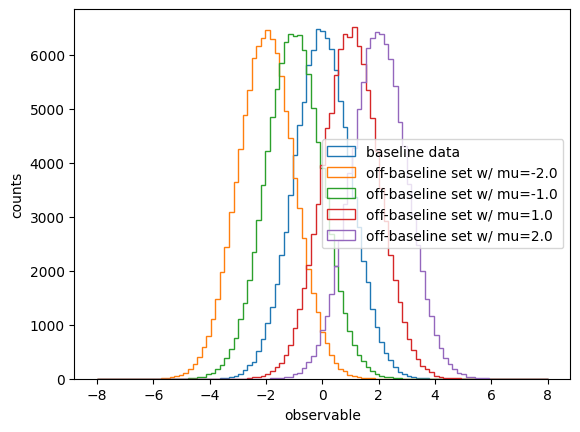

In [7]:
fig ,ax = plt.subplots()
bins = jnp.linspace(-8,8,100)
ax.hist(baseline_data,bins=bins,histtype="step",label="baseline data")
for i,goal_alpha in enumerate(off_baseline_mus):
    ax.hist(off_baseline_sets[i],bins=bins,histtype="step", label=f"off-baseline set w/ mu={goal_alpha}")
ax.set_xlabel("observable")
ax.set_ylabel("counts")
plt.legend()


In [4]:
flow = FlowSurface(x_train, alpha_train)

In [5]:
flow.train_flow()

100%|██████████| 100/100 [03:51<00:00,  2.32s/it, train=1.42, val=1.42]


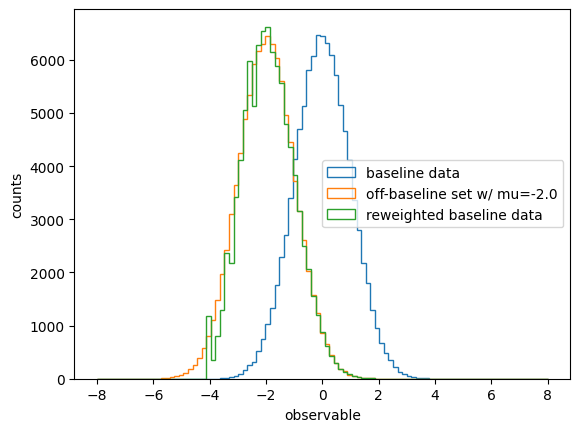

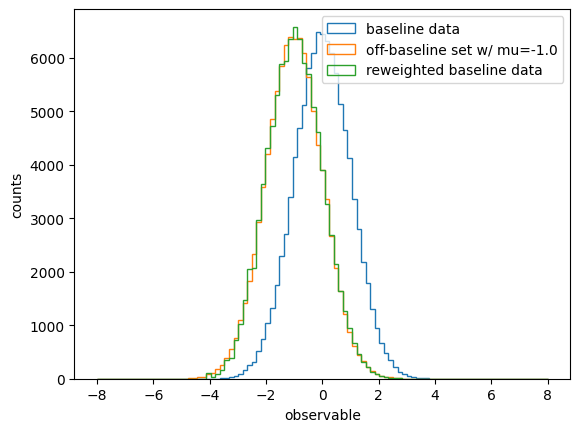

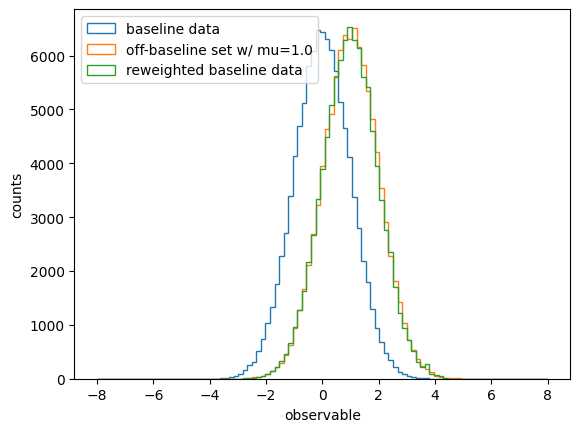

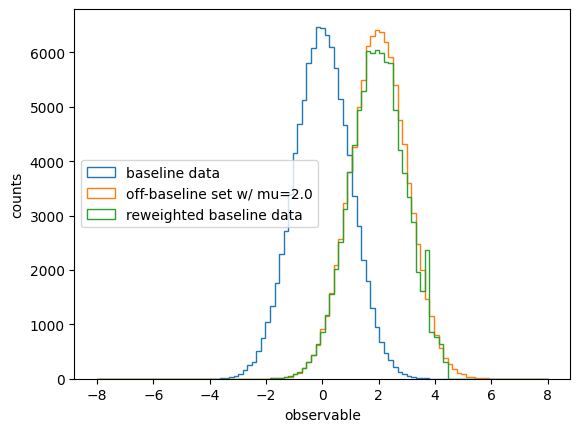

In [6]:
for i,goal_alpha in enumerate(off_baseline_mus):
    reweight = flow.get_weights(baseline_data,jnp.array([base_alpha]),jnp.array([goal_alpha]))
    fig, ax = plt.subplots()
    bins = jnp.linspace(-8,8,100)
    ax.hist(baseline_data,bins=bins,histtype="step",label="baseline data")
    ax.hist(off_baseline_sets[i],bins=bins,histtype="step", label=f"off-baseline set w/ mu={goal_alpha}")
    ax.hist(baseline_data,bins=bins,histtype="step",weights=reweight,label="reweighted baseline data")
    ax.set_xlabel("observable")
    ax.set_ylabel("counts")
    plt.legend()


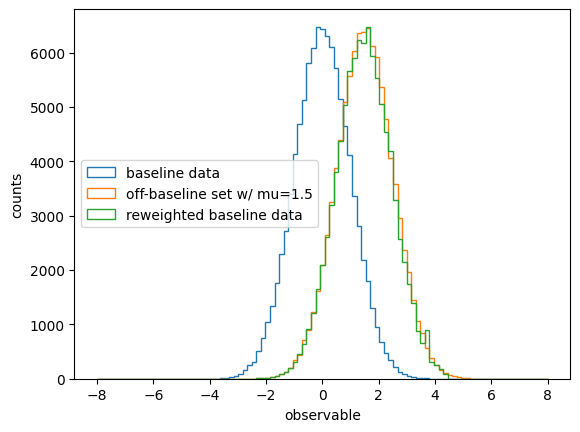

In [8]:

goal_alpha = 1.5
rng, subkey = jr.split(rng)
off_set = generate_discrete_dataset(subkey,goal_alpha,1.,N)

reweight = flow.get_weights(baseline_data,jnp.array([base_alpha]),jnp.array([goal_alpha]))
fig, ax = plt.subplots()
bins = jnp.linspace(-8,8,100)
ax.hist(baseline_data,bins=bins,histtype="step",label="baseline data")
ax.hist(off_set,bins=bins,histtype="step", label=f"off-baseline set w/ mu={goal_alpha}")
ax.hist(baseline_data,bins=bins,histtype="step",weights=reweight,label="reweighted baseline data")
ax.set_xlabel("observable")
ax.set_ylabel("counts")
plt.legend()


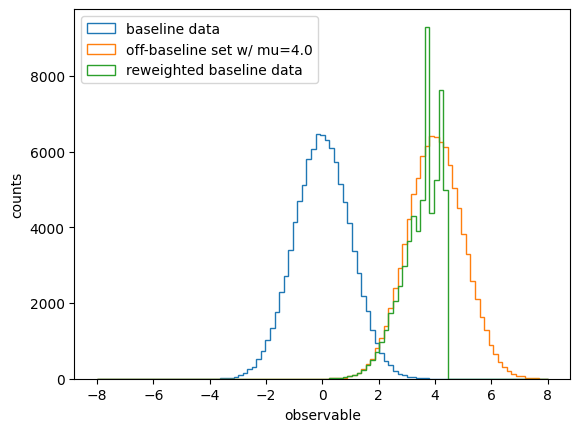

In [10]:
goal_alpha = 4.
rng, subkey = jr.split(rng)
off_set = generate_discrete_dataset(subkey,goal_alpha,1.,N)

reweight = flow.get_weights(baseline_data,jnp.array([base_alpha]),jnp.array([goal_alpha]))
fig, ax = plt.subplots()
bins = jnp.linspace(-8,8,100)
ax.hist(baseline_data,bins=bins,histtype="step",label="baseline data")
ax.hist(off_set,bins=bins,histtype="step", label=f"off-baseline set w/ mu={goal_alpha}")
ax.hist(baseline_data,bins=bins,histtype="step",weights=reweight,label="reweighted baseline data")
ax.set_xlabel("observable")
ax.set_ylabel("counts")
plt.legend()